## Logistic Regression (Classification Algorithm) Exercise with Titanic data

<b>Goal</b>: Predict survival based on passenger characteristics. 1 is survived and 0 is not. As this is a logistic regression exercise, use a logistic regression model to accomplish this goal. 

### Load Data

`titanic.csv` is in the data folder. The data is from Kaggle's Titanic competition. Information on the data is available [here](https://www.kaggle.com/c/titanic/data).

In [2]:
# You might have to figure out what other import statements you need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

# This is because we need to scale our algorithm
from sklearn.preprocessing import StandardScaler

# Figure out what to import the csv file 
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Arrange Data into Features Matrix and Target Vector
Make at least 4 features (Use at least Age and Sex columns) for your X. Make **Survived** series as the target. Keep in mind that one of the features (Age) has nans in them (meaning you need to either remove rows in the dataset with nans or impute them). Sex also needs to be transformed into 1's and 0's (strings are not an acceptable input for a model). 

In [3]:
# You will have to transform Sex into a non text form.
# I choose four features, you could have chosen others
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']

#### Transform Sex Column Values 

In [4]:
# Make sex into something you can feed into a model
# Has 
df['Sex'] = df.Sex.map({'male': 0, 
                                  'female': 1})

In [5]:
# You could also have mapped gender using the code below. 
"""
genderMapping = {'male': 0,
                 'female':1}
titanic.loc[:, 'Sex'] = titanic.loc[:,'Sex'].apply(lambda x: genderMapping.get(x))

"""

"\ngenderMapping = {'male': 0,\n                 'female':1}\ntitanic.loc[:, 'Sex'] = titanic.loc[:,'Sex'].apply(lambda x: genderMapping.get(x))\n\n"

#### Remove or Impute missing values for the Age Column

In [6]:
# Impute age with mean (this could introduce error)
# df.loc[df.Age.isna(), 'Age'] = np.floor(df.Age.mean())

In [7]:
# Remove rows where age is nan from the dataset
df = df.loc[~df['Age'].isnull(), :]

**Create X and y**

In [8]:
X = df.loc[:, feature_cols]

y = df['Survived']

### Split the data into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)

### Standardize Data
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. You can standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - mean) / std

The code below uses StandardScaler to accomplish this. 

In [10]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Fit a Logistic Regression (This is a classification algorithm)

Keep in mind that Logistic regression is NOT A REGRESSION ALGORITHM

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [11]:
from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

In [12]:
model= LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data. Model is learning the relationship between features and labels

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

<b>Step 4:</b> Predict the labels of new data (new passengers)

Uses the information the model learned during the model training process

In [14]:
# Returns a NumPy Array
# Predict for One Observation (image)
model.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0])

## Make predictions on the testing set and calculate the accuracy

In [15]:
# class predictions (not predicted probabilities)
predictions =model.predict(X_test)

In [16]:
# calculate classification accuracy
score = model.score(X_test, y_test)

In [17]:
score

0.8156424581005587

### Compare your testing accuracy to the null accuracy
Null accuracy is usually considered the accuracy obtained by always predicting the most frequent class.

When interpreting the predictive power of a model, it's best to compare it to a baseline using a dummy model, sometimes called a baseline model. A dummy model is simply using the mean, median, or most common value as the prediction. This forms a benchmark to compare your model against and becomes especially important in classification where your null accuracy might be 95 percent.

For example, suppose your dataset is **imbalanced** -- it contains 99% one class and 1% the other class. Then, your baseline accuracy (always guessing the first class) would be 99%. So, if your model is less than 99% accurate, you know it is worse than the baseline. Imbalanced datasets generally must be trained differently (with less of a focus on accuracy) because of this.

In [18]:
y_test.value_counts()

0    103
1     76
Name: Survived, dtype: int64

In [19]:
103 / (103 + 76)

0.5754189944134078

Since this particular model has an accuracy of roughly x%. By comparison, the null accuracy was 57.54%. The model provides some value. 

### Confusion matrix of Titanic predictions

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Hint you might wish to consider googling this one if you don't know how to do it. 

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)

(2.5, -0.5)

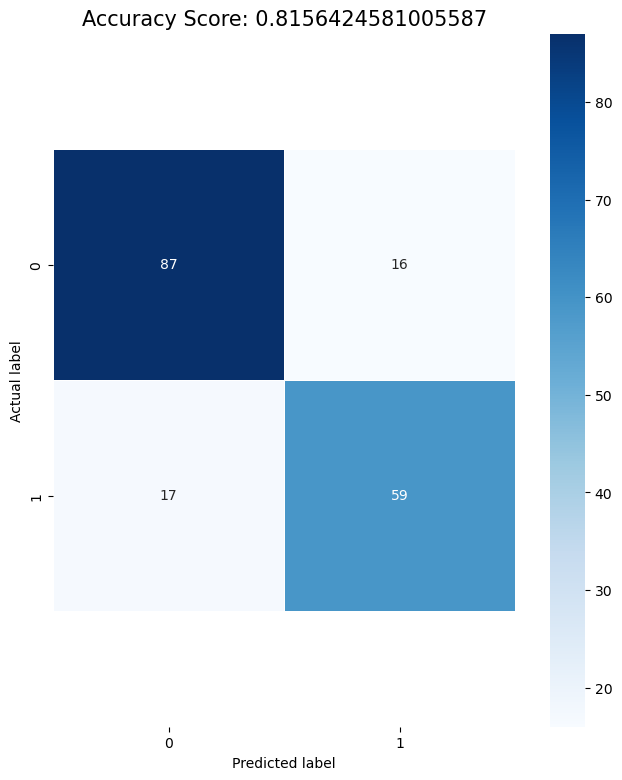

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values